## Holiday Package Prediciton

In [57]:
## import import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import warnings
# warnings.filterwarnings('igonre')
%matplotlib inline

In [58]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning 


In [59]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [60]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [61]:
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [62]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [63]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [64]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [65]:
## check missing value
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')


Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [66]:
## statistics on numerical columns 
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [67]:
## age 
df.Age.fillna(df.Age.median(),inplace=True)
## Type of contract 
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

## duration of pitch 
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

## number of followups 
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace= True)


## preferred property star
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

## number of trips 
df.NumberOfTrips.fillna(0,inplace=True)

## number of children visiting 
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

## MOnthly Income 
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [68]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [69]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [70]:
df.drop('CustomerID',inplace=True,axis=1)

## Feature Engineering 

In [71]:
## create new column for feature 
df['TotalVisiting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [72]:
## get all the numerical features 
num_features = [feature for feature in df.columns if df[feature].dtype!='O']
print('NUmber of numerical features ',len(num_features))

NUmber of numerical features  12


In [73]:
## categorical features 
cat_features = [feature for feature in df.columns if df[feature].dtype =='O']
print("num of categorical featuers ",len(cat_features))

num of categorical featuers  6


In [74]:
## discrete features 
discrete_features = [feature for feature in num_features if len (df[feature].unique())<25]
print("num of discrete features",len(discrete_features))

num of discrete features 9


In [75]:
## continuous features 
continuous_features = [feature for feature in num_features if num_features if feature not in discrete_features]
print('num of continous features',len(continuous_features))

num of continous features 3


In [76]:
from sklearn.model_selection import train_test_split
X= df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [77]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [78]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [80]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [82]:
## create column transformer  with 3 type of transfomers 
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)


In [83]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [84]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [85]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-1.134871,-0.705341,-0.731971,-1.140320,-0.651864,-0.781845,0.781268,-0.419013,-0.064790
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,1.073130,0.292807,1.775261,0.987153,1.534062,-0.052422,0.781268,0.767332,1.358407
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.276204,-0.705341,-0.731971,0.455285,-0.651864,0.677002,0.781268,-0.766608,-0.776389
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.707560,-1.134871,-0.705341,-0.731971,0.987153,-0.651864,-1.511269,0.781268,-0.597614,-0.776389
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.707560,2.177130,1.290954,-0.731971,0.987153,1.534062,-0.781845,0.781268,-0.088750,0.646809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.707560,-1.134871,-0.705341,-0.731971,0.987153,-0.651864,1.406426,0.781268,-1.006439,-0.776389
974,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.707560,0.091796,1.290954,-0.731971,-0.608452,-0.651864,-0.781845,0.781268,-0.171457,-0.776389
975,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.091796,-0.705341,-0.731971,-1.140320,-0.651864,-0.781845,-1.279971,-0.441055,-0.776389
976,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.707560,1.563797,-0.705341,0.521645,0.455285,-0.651864,0.677002,-1.279971,1.477406,-0.064790


In [86]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.389411,1.073130,0.292807,-0.731971,-0.608452,1.534062,1.406426,-1.279971,-0.405448,0.646809
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,0.521645,-0.608452,-0.651864,-0.052422,0.781268,-0.385666,-0.776389
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.707560,-0.276204,-0.705341,1.775261,-1.140320,-0.651864,1.406426,0.781268,0.266381,-1.487987
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,-0.731971,0.455285,-0.651864,-0.781845,-1.279971,-1.221778,-0.776389
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-0.644204,0.292807,-0.731971,-0.076584,1.534062,-1.511269,0.781268,-0.373797,0.646809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.459796,0.292807,-0.731971,0.987153,1.534062,-0.052422,0.781268,2.258317,0.646809
3906,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.486381,0.337130,0.292807,-0.731971,-0.076584,-0.651864,1.406426,-1.279971,0.014115,-0.064790
3907,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-1.134871,0.292807,-0.731971,-0.076584,-0.651864,-0.052422,0.781268,-0.919587,-1.487987
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.707560,1.931797,-0.705341,-0.731971,0.987153,1.534062,0.677002,0.781268,0.856445,0.646809


## Random forest classifier

In [96]:
## machine learning model tranning random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [97]:
models={
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "logistic Regression":LogisticRegression()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    ## make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    
    ## test set performance 
    model_test_accuracy  = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Tranning set')
    print("-Accuracy:{:.4f}".format(model_train_accuracy))
    print("-F1 Score:{:.4f}".format(model_train_f1))
    print("-Precision:{:.4f}".format(model_train_precision))
    print("-Re call:{:.4f}".format(model_train_recall))
    print("-Roc Auc Score:{:.4f}".format(model_train_rocauc_score))
    
    
    
    print("-------------------------------------------------------------------------")
    
    print('Model performance for Testing set')
    print("-Accuracy:{:.4f}".format(model_test_accuracy))
    print("-F1 Score:{:.4f}".format(model_test_f1))
    print("-Precision:{:.4f}".format(model_test_precision))
    print("-Re call:{:.4f}".format(model_test_recall))
    print("-Roc Auc Score:{:.4f}".format(model_test_rocauc_score))
    
    print('='*75)
    print('\n')
    

Random Forest
Model performance for Tranning set
-Accuracy:1.0000
-F1 Score:1.0000
-Precision:1.0000
-Re call:1.0000
-Roc Auc Score:1.0000
-------------------------------------------------------------------------
Model performance for Testing set
-Accuracy:0.9294
-F1 Score:0.9238
-Precision:0.9587
-Re call:0.6444
-Roc Auc Score:0.8191


Decision Tree
Model performance for Tranning set
-Accuracy:1.0000
-F1 Score:1.0000
-Precision:1.0000
-Re call:1.0000
-Roc Auc Score:1.0000
-------------------------------------------------------------------------
Model performance for Testing set
-Accuracy:0.9376
-F1 Score:0.9370
-Precision:0.8480
-Re call:0.8056
-Roc Auc Score:0.8865


logistic Regression
Model performance for Tranning set
-Accuracy:0.8455
-F1 Score:0.8204
-Precision:0.7073
-Re call:0.3135
-Roc Auc Score:0.6416
-------------------------------------------------------------------------
Model performance for Testing set
-Accuracy:0.8395
-F1 Score:0.8054
-Precision:0.6885
-Re call:0.2333
-

In [99]:
## hyper parameter training 
rf_params ={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,6,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [101]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 6, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [102]:
## models list for hyperparameter tuning 
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
]

In [103]:
from sklearn.model_selection import RandomizedSearchCV
model_param ={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    for model_name in model_param:
        print(f"--------------------------Best params for {model_name}---------------------------------")
        print( model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=6, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=8,

/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.10/site-pac

--------------------------Best params for RF---------------------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [104]:
models={
    "Random Forest":RandomForestClassifier(n_estimators= 200, min_samples_split=2,max_features= 8,)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    ## make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    
    ## test set performance 
    model_test_accuracy  = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Tranning set')
    print("-Accuracy:{:.4f}".format(model_train_accuracy))
    print("-F1 Score:{:.4f}".format(model_train_f1))
    print("-Precision:{:.4f}".format(model_train_precision))
    print("-Re call:{:.4f}".format(model_train_recall))
    print("-Roc Auc Score:{:.4f}".format(model_train_rocauc_score))
    
    
    
    print("-------------------------------------------------------------------------")
    
    print('Model performance for Testing set')
    print("-Accuracy:{:.4f}".format(model_test_accuracy))
    print("-F1 Score:{:.4f}".format(model_test_f1))
    print("-Precision:{:.4f}".format(model_test_precision))
    print("-Re call:{:.4f}".format(model_test_recall))
    print("-Roc Auc Score:{:.4f}".format(model_test_rocauc_score))
    
    print('='*75)
    print('\n')
    

Random Forest
Model performance for Tranning set
-Accuracy:1.0000
-F1 Score:1.0000
-Precision:1.0000
-Re call:1.0000
-Roc Auc Score:1.0000
-------------------------------------------------------------------------
Model performance for Testing set
-Accuracy:0.9397
-F1 Score:0.9360
-Precision:0.9549
-Re call:0.7056
-Roc Auc Score:0.8490




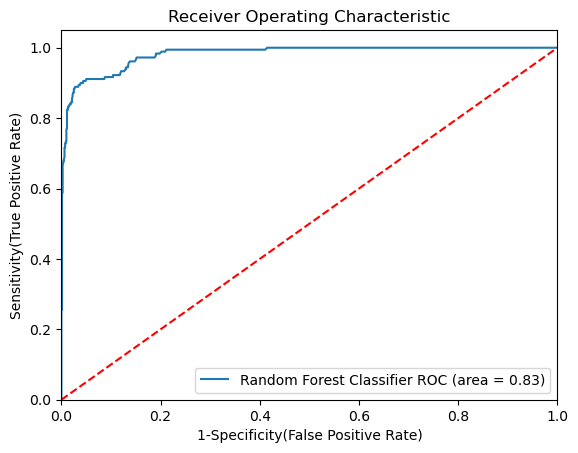

In [105]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 